In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def load_controller_csv(path, label):

    df = pd.read_csv(path)

    # Convert temperatures (stored with -273 offset)
    df["T_out_C"] = df["T_out"] - 273.15
    df["T_Cor_C"] = df["T_cor"] - 273.15
    df["T_Nor_C"] = df["T_nor"] - 273.15
    df["T_Sou_C"] = df["T_sou"] - 273.15

    # Incremental energy (useful diagnostically)
    df["energy_step"] = df["energy_kWh"].diff().fillna(0.0)

    # Time index
    df["time"] = np.arange(len(df))

    # Controller label
    df["controller"] = label

    return df


def plot_indoor_temperature_Cor(dfs, comfort_low=22, comfort_high=25):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["T_Cor_C"], label=label)

    plt.axhline(comfort_low, linestyle="--")
    plt.axhline(comfort_high, linestyle="--")

    plt.xlabel("Time step")
    plt.ylabel("Indoor temperature at zone Cor [°C]")
    plt.title("Indoor Temperature Comparison at zone Cor")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_indoor_temperature_Nor(dfs, comfort_low=18, comfort_high=21):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["T_Nor_C"], label=label)

    plt.axhline(comfort_low, linestyle="--")
    plt.axhline(comfort_high, linestyle="--")

    plt.xlabel("Time step")
    plt.ylabel("Indoor temperature at zone Nor [°C]")
    plt.title("Indoor Temperature Comparison at zone Nor")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_indoor_temperature_Sou(dfs, comfort_low=19, comfort_high=21):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["T_Sou_C"], label=label)

    plt.axhline(comfort_low, linestyle="--")
    plt.axhline(comfort_high, linestyle="--")

    plt.xlabel("Time step")
    plt.ylabel("Indoor temperature at zone Sou [°C]")
    plt.title("Indoor Temperature Comparison at zone Sou")
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_external_temperature(dfs):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["T_out_C"], label=label)

    plt.xlabel("Time step")
    plt.ylabel("Outdoor temperature [°C]")
    plt.title("Outdoor Temperature Comparison")
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_actions_cor(dfs):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["action_cor"], label=label)

    plt.xlabel("Time step")
    plt.ylabel("Action")
    plt.title("Control Action Comparison zone Cor")
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_cumulative_energy(dfs):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["energy_kWh"], label=label)

    plt.xlabel("Time step")
    plt.ylabel("Cumulative energy [kWh]")
    plt.title("Cumulative Energy Consumption")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_actions_nor(dfs):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["action_nor"], label=label)

    plt.xlabel("Time step")
    plt.ylabel("Action")
    plt.title("Control Action Comparison zone Nor")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_actions_sou(dfs):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["action_cor"], label=label)

    plt.xlabel("Time step")
    plt.ylabel("Action")
    plt.title("Control Action Comparison zone Sou")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
def plot_cumulative_discomfort(dfs):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["discomfort"], label=label)

    plt.xlabel("Time step")
    plt.ylabel("Thermal discomfort [°C·h]")
    plt.title("Cumulative Thermal Discomfort")
    plt.legend()
    plt.tight_layout()
    plt.show()


def print_summary_table(dfs):
    print("\nController Performance Summary")
    print("-" * 50)

    for df in dfs:
        label = df["controller"].iloc[0]
        total_energy = df["energy_kWh"].iloc[-1]
        total_discomfort = df["discomfort"].iloc[-1]

        print(
            f"{label:15s} | "
            f"Energy: {total_energy:8.2f} kWh | "
            f"Discomfort: {total_discomfort:8.2f} °C·h"
        )

def denormalize(df, bounds):
    """
    De-normalization of DataFrame columns from [-1, 1].

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with normalized columns
    bounds : dict
        {column_name: (min, max)} in original physical units
    """
    for col, (x_min, x_max) in bounds.items():
        df[col] = 0.5 * (df[col] + 1.0) * (x_max - x_min) + x_min

def normalize(df, bounds):
    """
    normalizer in case I de-normalize twice by accident
    """
    for col, (x_min, x_max) in bounds.items():
        df[col] = 2.0 * (df[col] - x_min) / (x_max - x_min) - 1.0
        

In [3]:
df = pd.read_csv("sac_5.csv")

bounds = {
    "T_cor": (288,302),
    "T_nor": (288,302),
    "T_sou": (288,302),
    "T_out": (258,303)
}

denormalize(
    df,
    bounds=bounds
)
df.to_csv("sac_5_normalized.csv", index=False)
print(df.shape)


(1440, 10)


In [16]:
dfs = [
    load_controller_csv("sac_5_normalized.csv", "SAC_5"),
]


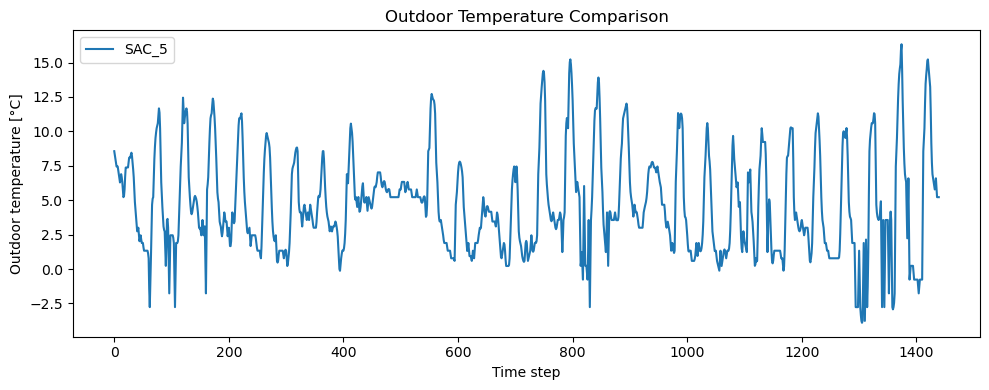

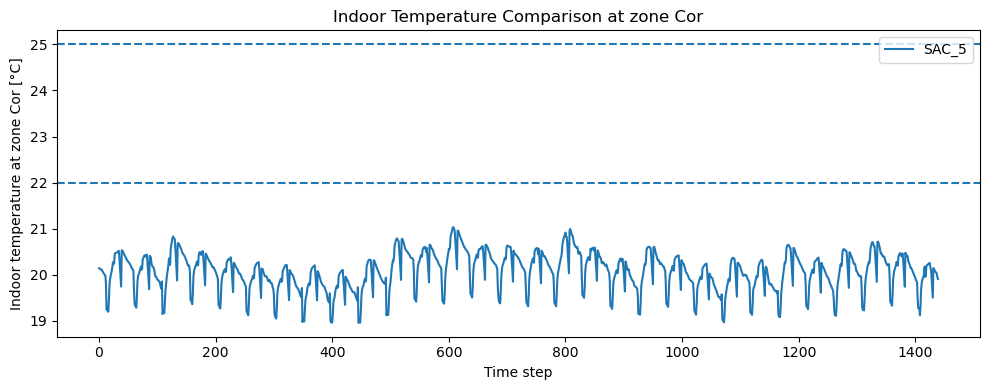

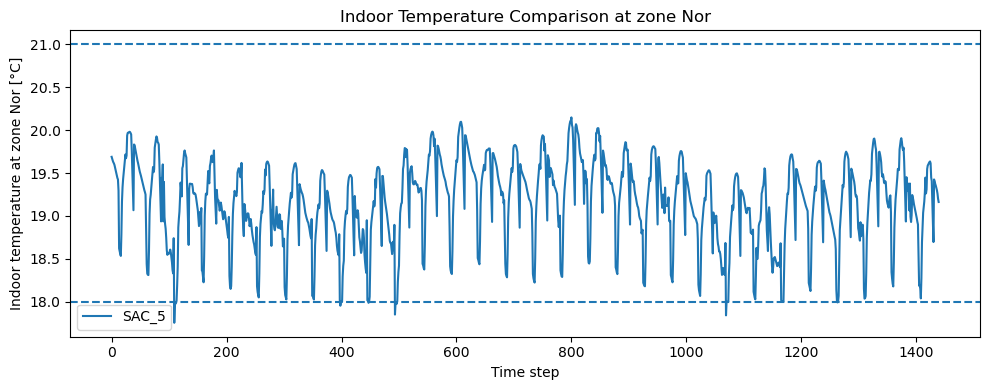

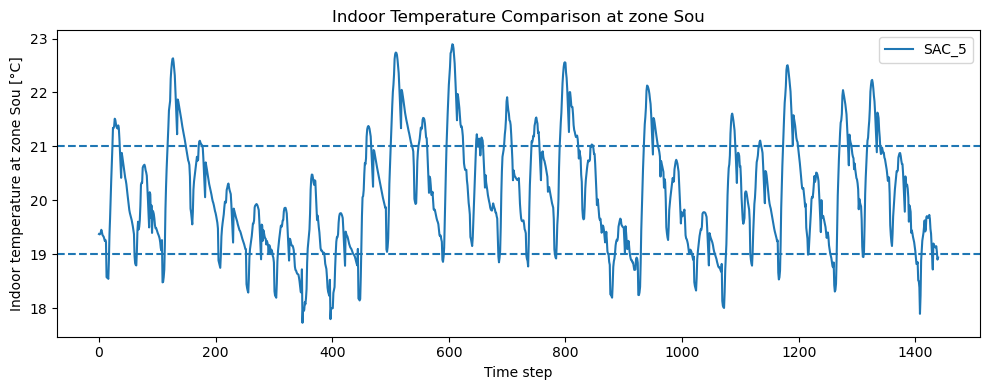

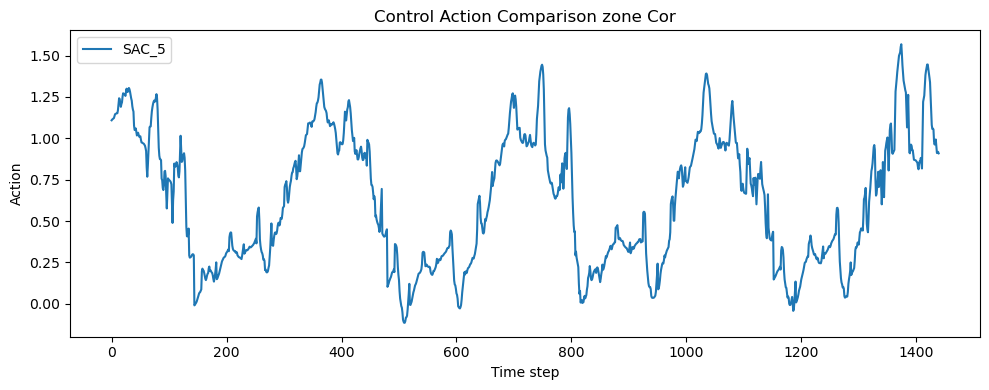

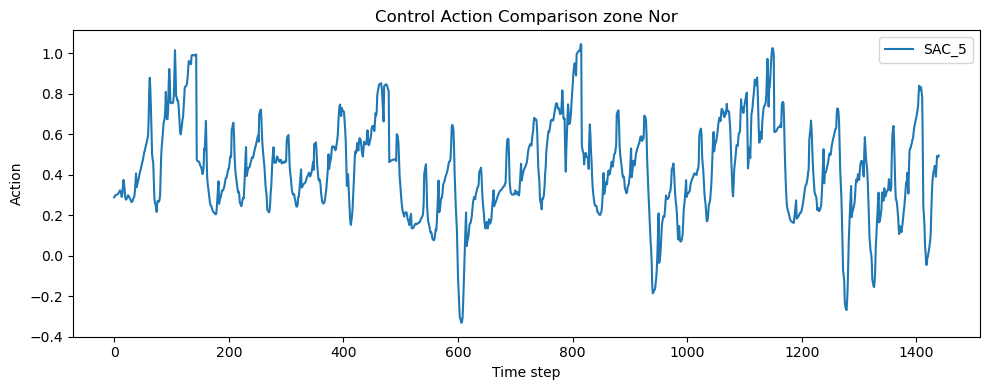

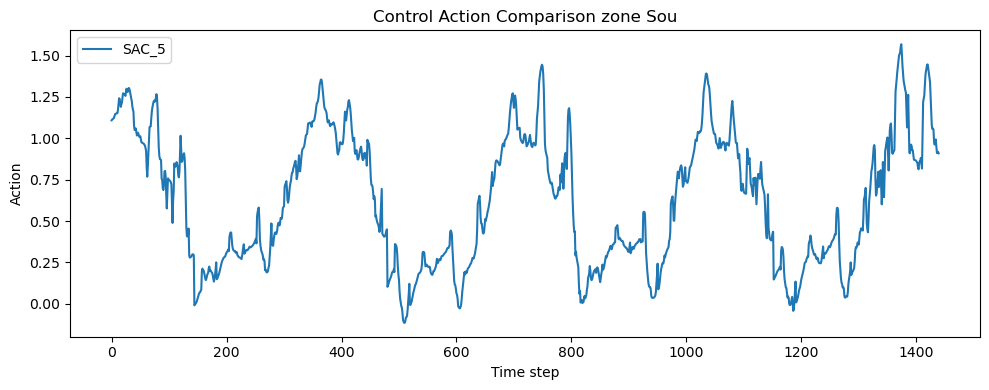

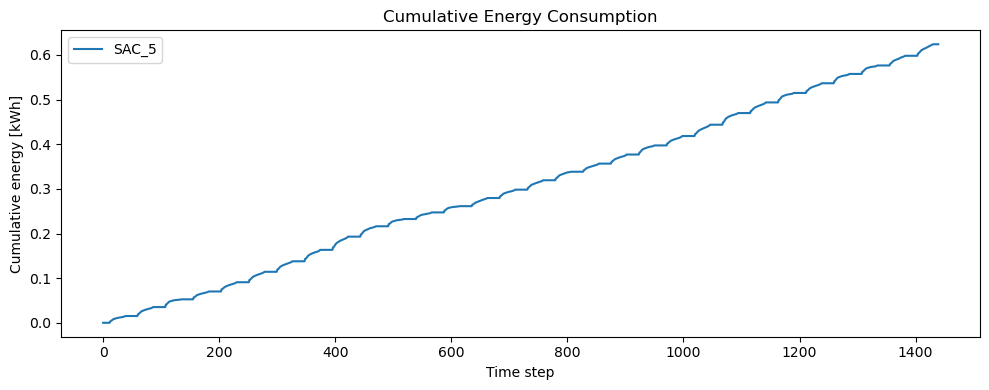

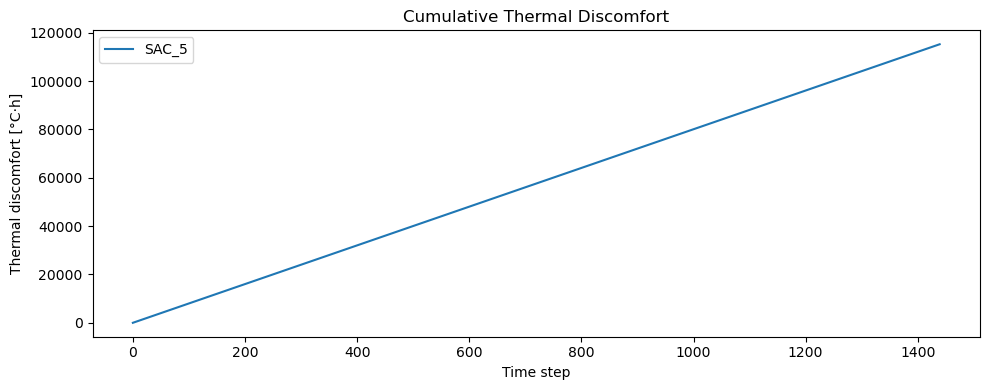


Controller Performance Summary
--------------------------------------------------
SAC_5           | Energy:     0.62 kWh | Discomfort: 115240.19 °C·h


In [18]:
plot_external_temperature(dfs)
plot_indoor_temperature_Cor(dfs)
plot_indoor_temperature_Nor(dfs)
plot_indoor_temperature_Sou(dfs)

plot_actions_cor(dfs)
plot_actions_nor(dfs)
plot_actions_sou(dfs)
#
plot_cumulative_energy(dfs)
plot_cumulative_discomfort(dfs)
print_summary_table(dfs)